# تعیین تابع فعالیت مناسب

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline

# Definding function:

In [2]:
# this function give file of data  as numpy array or image

def getImageData(filename):
    f = open(filename,'rb')
    datadict = cPickle.load(f,encoding='latin1') #Why the hell latin1 ???
    f.close()
    X=datadict['data'].reshape((len(datadict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return X


# this function give file of data  as dictionary


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

shape of input image: (10000, 32, 32, 3)
#############################################
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of target vector: (10000, 10)


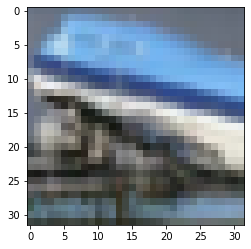

In [33]:
file='cifar-10-batches-py\data_batch_3'

X_image = getImageData(file)
x=unpickle(file)


print('shape of input image:',X_image.shape)
print('#############################################')
plt.imshow(X_image[35])


#geting vector  of target of data:
y=x[b'labels']
y_train=to_categorical(y)
print(y_train[35])
print('shape of target vector:',y_train.shape)

preprocess data: step one:

In [34]:
x_flatten=X_image.reshape(10000,-1)

x_train=x_flatten/255

# Constructing model:

در این قسمت با تغییر تابع فعالیت لایه وسط و ثابت نگه داشتن سایر پارامتر ها بهترین تابع فعالیت  را تعیین کرده

In [35]:
activation_functions=['sigmoid','tanh','relu']

model=Sequential()



model.add(Dense(500,activation=activation_functions[2],input_dim=3072))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5010      
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=128,epochs=75)

Epoch 1/75
71/71 [==============================] - 1s 8ms/step - loss: 2.4306 - accuracy: 0.2292 - val_loss: 1.9466 - val_accuracy: 0.3100
Epoch 2/75
71/71 [==============================] - 0s 7ms/step - loss: 1.9085 - accuracy: 0.3187 - val_loss: 1.8998 - val_accuracy: 0.3310
Epoch 3/75
71/71 [==============================] - 0s 6ms/step - loss: 1.8263 - accuracy: 0.3533 - val_loss: 1.8048 - val_accuracy: 0.3720
Epoch 4/75
71/71 [==============================] - 0s 6ms/step - loss: 1.7787 - accuracy: 0.3664 - val_loss: 1.7944 - val_accuracy: 0.3710
Epoch 5/75
71/71 [==============================] - 0s 6ms/step - loss: 1.7397 - accuracy: 0.3876 - val_loss: 1.8728 - val_accuracy: 0.3320
Epoch 6/75
71/71 [==============================] - 0s 6ms/step - loss: 1.7212 - accuracy: 0.3907 - val_loss: 1.7754 - val_accuracy: 0.3730
Epoch 7/75
71/71 [==============================] - 0s 6ms/step - loss: 1.6740 - accuracy: 0.4086 - val_loss: 1.7384 - val_accuracy: 0.3890
Epoch 8/75
71/71 [==

71/71 [==============================] - 0s 6ms/step - loss: 0.9632 - accuracy: 0.6658 - val_loss: 1.7111 - val_accuracy: 0.4440
Epoch 60/75
71/71 [==============================] - 0s 7ms/step - loss: 0.9614 - accuracy: 0.6664 - val_loss: 1.7735 - val_accuracy: 0.4490
Epoch 61/75
71/71 [==============================] - 0s 7ms/step - loss: 0.9468 - accuracy: 0.6704 - val_loss: 1.8753 - val_accuracy: 0.4150
Epoch 62/75
71/71 [==============================] - 0s 6ms/step - loss: 0.9363 - accuracy: 0.6756 - val_loss: 1.8233 - val_accuracy: 0.4410
Epoch 63/75
71/71 [==============================] - 0s 6ms/step - loss: 0.9332 - accuracy: 0.6731 - val_loss: 1.8066 - val_accuracy: 0.4600
Epoch 64/75
71/71 [==============================] - 0s 6ms/step - loss: 0.9197 - accuracy: 0.6794 - val_loss: 1.8417 - val_accuracy: 0.4290
Epoch 65/75
71/71 [==============================] - 0s 6ms/step - loss: 0.9272 - accuracy: 0.6772 - val_loss: 1.8078 - val_accuracy: 0.4310
Epoch 66/75
71/71 [======

Plotting learn curves:

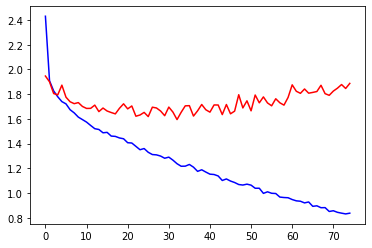

In [38]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

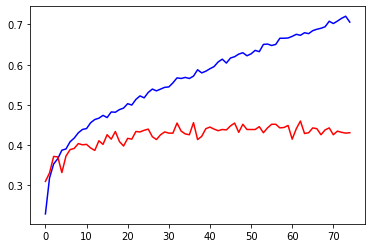

In [39]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [40]:
print('max acc of validation:',max(history.history['val_accuracy']))

max acc of validation: 0.46000000834465027


In [41]:
print('max acc of trian:',max(history.history['accuracy']))

max acc of trian: 0.7204444408416748
